In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [199]:
df = pd.read_csv("../flare_tables/20200220_vetted_flares.csv",
                names=['ampl_rec','cstart','cstop','ed_rec','ed_rec_err',
                    'istart', 'istop','total_n_valid_data_points', 
                    'tstart', 'tstop',  'dur', 'ed_ratio','ed_ratio_count',
            'amplitude_ratio','amplitude_ratio_count','duration_ratio','duration_ratio_count',
            'amplitude_corr','duration_corr','ed_corr','recovery_probability','recovery_probability_count',
            'ed_ratio_std','amplitude_ratio_std','duration_ratio_std','recovery_probability_std',
            'ed_corr_err','amplitude_corr_err','duration_corr_err',"TIC","sector"])
              
spts = pd.read_csv("../flare_tables/spts.csv")

spts.head()
df = df.merge(spts[["TIC","spt","TESSmag"]],on="TIC")
df.head()

,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,tstop,...,amplitude_ratio_std,duration_ratio_std,recovery_probability_std,ed_corr_err,amplitude_corr_err,duration_corr_err,TIC,sector,spt,TESSmag
0,0.311585,132727,132730,74.697007,3.282262,482,485,14058.0,1411.802828,1411.806994,...,NaN,NaN,NaN,NaN,NaN,NaN,279482950,4,M6,13.6675
1,0.950485,134409,134415,268.521311,3.197337,2128,2134,14058.0,1414.139021,1414.147355,...,NaN,NaN,NaN,NaN,NaN,NaN,279482950,4,M6,13.6675
2,1.555234,136554,136570,410.707539,3.836969,4246,4259,14058.0,1417.118276,1417.140499,...,NaN,NaN,NaN,NaN,NaN,NaN,279482950,4,M6,13.6675
3,0.431895,159134,159143,162.191646,2.411508,7057,7066,16349.0,1448.479556,1448.492056,...,0.127923,0.861177,0.390154,11.835807,0.079072,0.001837,279482950,5,M6,13.6675
4,0.357681,162470,162478,142.902470,2.105416,8989,8997,16349.0,1453.112801,1453.123912,...,0.147267,0.573457,0.331201,12.701748,0.077981,0.001645,279482950,5,M6,13.6675


In [200]:
df.shape

(408, 33)

In [201]:
df = df[df.istart-df.istop < -5]

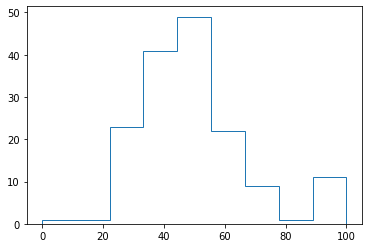

In [202]:
plt.hist(df.recovery_probability_count, bins=np.linspace(0,100,10), histtype="step");

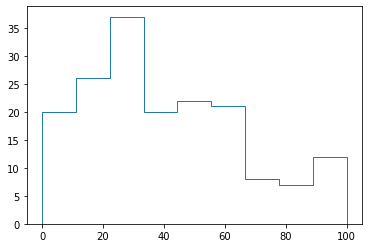

In [203]:
plt.hist(df.ed_ratio_count, bins=np.linspace(0,100,10), histtype="step");

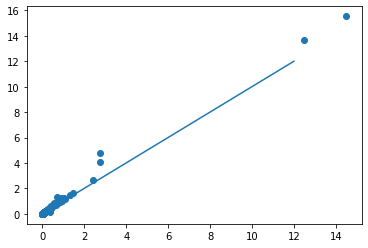

In [204]:
plt.scatter(df.ampl_rec, df.amplitude_corr)
plt.plot([0,12],[0,12])

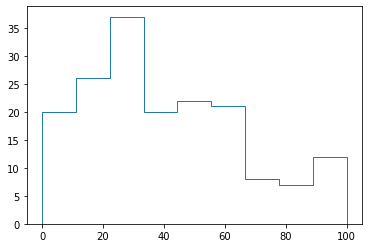

In [205]:
plt.hist(df.amplitude_ratio_count, bins=np.linspace(0,100,10), histtype="step");

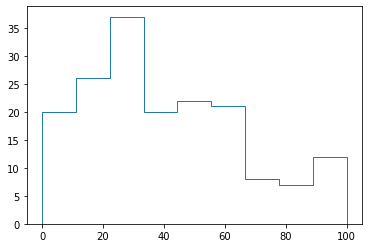

In [206]:
plt.hist(df.duration_ratio_count, bins=np.linspace(0,100,10), histtype="step");

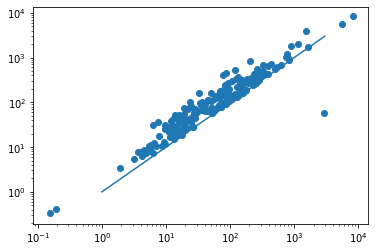

In [207]:
plt.scatter(df.ed_rec, df.ed_corr)
plt.plot([1,3e3],[1,3e3])
plt.yscale("log")
plt.xscale("log")

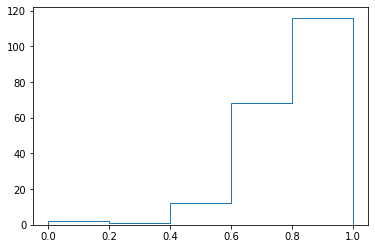

In [208]:
plt.hist(df.recovery_probability, bins=np.linspace(0,1,6), histtype="step");

(array([22.,  0., 20.,  0.,  0.,  0.,  0., 15., 31.,  4.,  6.,  0., 28.,
        26., 22., 18.,  9.,  0.,  1.,  2.]),
 array([ 7.613  ,  8.02475,  8.4365 ,  8.84825,  9.26   ,  9.67175,
        10.0835 , 10.49525, 10.907  , 11.31875, 11.7305 , 12.14225,
        12.554  , 12.96575, 13.3775 , 13.78925, 14.201  , 14.61275,
        15.0245 , 15.43625, 15.848  ]),
 <a list of 20 Patch objects>)

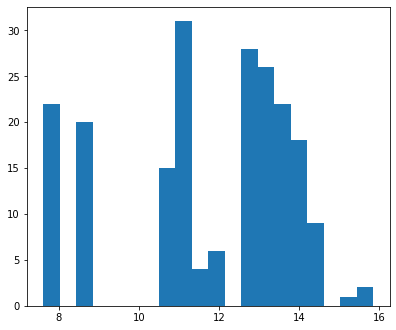

In [209]:
#correct for magnitudes
plt.figure(figsize=(6.5,5.5))
plt.hist(df.TESSmag, bins=20)


In [210]:
df = df[~np.isnan(df.recovery_probability)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr)]
df["encorrprob"] = 1./df.recovery_probability.values

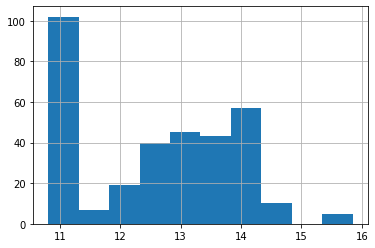

In [196]:
df[df.TESSmag>10].TESSmag.hist()

In [197]:
#df = df[df.TESSmag>10]

In [211]:
df[['ed_rec', 'ed_corr','TIC',"sector", "TESSmag"]].tail(25)

,ed_rec,ed_corr,TIC,sector,TESSmag
329,14.458862,17.559032,29928567,3,8.5390
302,7.728052,17.358056,272349442,10,10.8100
338,11.380163,17.134431,29928567,3,8.5390
353,13.497960,15.112616,29928567,3,8.5390
218,9.216663,12.752154,388857263,12,7.6130
238,6.413591,12.355184,388857263,12,7.6130
332,9.686625,11.840203,29928567,3,8.5390
233,5.897948,11.361847,388857263,12,7.6130
352,6.321271,11.166802,29928567,3,8.5390
321,7.074359,10.651439,29928567,3,8.5390


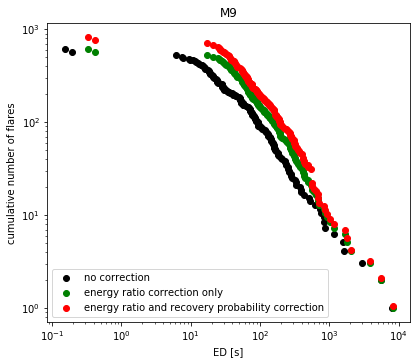

In [185]:
df = df[~np.isnan(df.recovery_probability)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr)]
#df["encorrprob"] = 1./df.recovery_probability.values/np.array(freq)
df = df.sort_values(by="ed_corr", ascending=True)
freq = []
for i in range(df.shape[0]):
    f = df.iloc[:i+1]
    freq.append(len(set(f.TIC.values)))

df = df.sort_values(by="ed_corr", ascending=False)

#for spt, df in F.groupby("spt"):
    #print(la)
    #df = df[(df.TESSmag > 11.14) & (df.TESSmag <11.3)]
plt.figure(figsize=(6.5,5.5))
plt.scatter(df.ed_rec.sort_values(ascending=False), np.cumsum(1/np.array(freq[::-1])*freq[-1]), c="k", label="no correction")
plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(1/np.array(freq[::-1])*freq[-1]), c="g", label="energy ratio correction only")
plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(1./df.recovery_probability.values/np.array(freq[::-1])*freq[-1]), c="r", label="energy ratio and recovery probability correction")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
plt.title(spt)
plt.legend()
#     plt.figure(figsize=(6.5,5.5))
#     plt.hist(df.TESSmag)
#     plt.title(spt)
# #plt.savefig("plots/{}_FFD_two_step_correction.png".format(today), dpi=300)

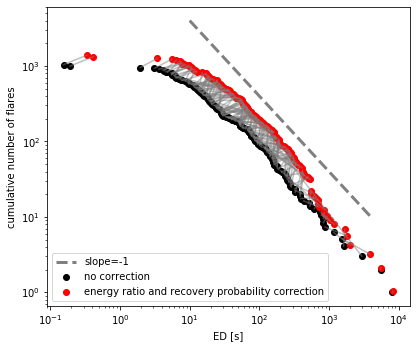

In [180]:
#df = df[df.recovery_probability > .2]


df = df.sort_values(by="ed_rec", ascending=False)
df['probnocorrcum'] = np.cumsum(1/np.array(freq[::-1])*freq[-1])
df['sortededrec'] =df.ed_rec.sort_values(ascending=False)
df = df.sort_values(by="ed_corr", ascending=False)
df = df[(~df.ed_corr.isnull()) & (np.isfinite(df.ed_corr)) & (df.recovery_probability >0.10) ]
df["ed_corrprob"] = 1/df.recovery_probability.values/np.array(freq[::-1])*freq[-1]
df["ed_corrprob_err"] = df.recovery_probability_std / df.recovery_probability**2
df["ed_corrprobcum"] = np.cumsum(df.ed_corrprob.values)


plt.figure(figsize=(6.5,5.5))
for l, row in df.iterrows():
    plt.plot([row.sortededrec, row.ed_corr], [row.probnocorrcum, row.ed_corrprobcum],c="grey",alpha=.5)
plt.scatter(df["sortededrec"], df["probnocorrcum"], label="no correction", c="k")#, condition {}".format(label))
plt.scatter(df.ed_corr, df["ed_corrprobcum"], label="energy ratio and recovery probability correction", c="r")#, condition {}".format(label))
plt.plot([10, 4000],[4000, 10], label="slope=-1", linestyle="dashed", c="grey", linewidth=3)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(.8,250)
#plt.xlim(5,4000)
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
plt.legend()
#plt.savefig("plots/{}_FFD_flare_correspondence_correction.png".format(today), dpi=300)

In [37]:
df.shape

(65, 35)